In [2]:
#Importamos Librerias
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df_diamonds=pd.read_csv('diamonds.csv')
df_diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,NaN,58.0,2757.0,6.15,6.12,3.74


In [4]:
print(df_diamonds.head(5))

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0  326.0  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0  326.0  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0  327.0  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0  334.0  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0  335.0  4.34  4.35  2.75


### Vemos Valores nulos

In [5]:
#Obtenemos la cuenta de los elementos nulos del dataframe por COLUMNA
Cuenta_Nulos= df_diamonds.isnull().sum()
Cuenta_Nulos

carat      3
cut        0
color      0
clarity    0
depth      2
table      3
price      3
x          1
y          1
z          4
dtype: int64

In [6]:
## Al ser pocos valores y representar menos el 1% del total de datos, podemos eliminarlos
data2= df_diamonds.dropna(0)
data2

C:\Users\mafer\AppData\Local\Temp\ipykernel_56964\124296234.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  data2= df_diamonds.dropna(0)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53934,0.72,Premium,D,SI1,62.7,59.0,2757.0,5.69,5.73,3.58
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56


**Variables cuantitativas:** carat, depth, table, price, x, y, z

#### Verificamos Outliers

En esta ocasión por el tipo de datos no podemos eliminar o sustituir los outliers que nos salgan, debido a que estas modificaciones podrían quitarnos demasiados datos importantes, sobre todo al hablar de diamantes. 
    Por ejemplo, como el precio de los diamantes va a variar totalmente por el tamaño, el corte y otras variables, vamos a tener gran variedad de precios que no podemos modificar.
    Al mimsmo tiempo, los valores como las medidas son imposibles de modificar.

**No tenemos OUTLIERS**

 ## **Correlaciones** 

**Variable dependiente:** Price (variable respuesta),

**Variables independientes:** Carat, Depth, table, tamaño (x, y, z)

<AxesSubplot:xlabel='carat', ylabel='price'>

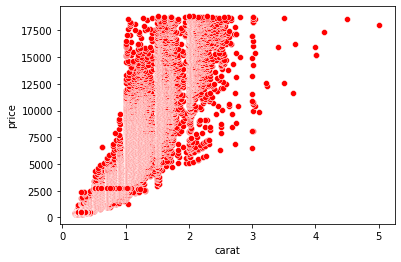

In [7]:
#Regresión simple con CARAT
from turtle import color

sns.scatterplot(x='carat', y='price', color="red", data=data2)

In [9]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data2[['carat']]
Var_Dep= data2['price']

In [10]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [11]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [12]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['carat'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([7756.40625124]),
 'rank_': 1,
 'singular_': array([110.08427544]),
 'intercept_': -2256.2217455677355}

In [13]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.8493343344428106

In [14]:
#Coeficiente de correlación
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.9215933671868578

<AxesSubplot:xlabel='depth', ylabel='price'>

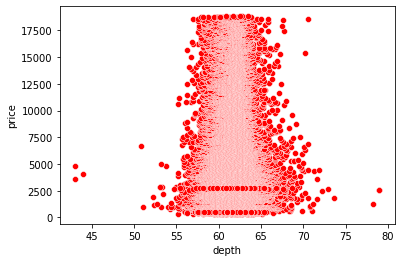

In [15]:
#Regresión simple con DEPTH
from turtle import color

sns.scatterplot(x='depth', y='price', color="red", data=data2)

In [16]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep2= data2[['depth']]
Var_Dep2= data2['price']

In [17]:
model.fit(X=Vars_Indep2, y=Var_Dep2)

LinearRegression()

In [18]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Deter_Depth=model.score(X=Vars_Indep2, y=Var_Dep2)
coef_Deter_Depth

0.00011389140899376038

In [19]:
#Coeficiente de correlación
coef_Correl_depth=np.sqrt(coef_Deter_Depth)
coef_Correl_depth

0.010671991800679027

<AxesSubplot:xlabel='table', ylabel='price'>

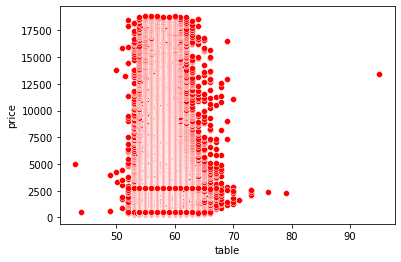

In [20]:
#Regresión simple con TABLE
from turtle import color

sns.scatterplot(x='table', y='price', color="red", data=data2)

In [21]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep3= data2[['table']]
Var_Dep3= data2['price']

In [23]:
model.fit(X=Vars_Indep3, y=Var_Dep3)

LinearRegression()

In [24]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Deter_table=model.score(X=Vars_Indep3, y=Var_Dep3)
coef_Deter_table

0.01617584591501875

In [25]:
#Coeficiente de correlación
coef_Correl_table=np.sqrt(coef_Deter_table)
coef_Correl_table

0.12718429901139036

Regresiones Múltiples

In [30]:
#Regresión con CARAT Y DEPTH

#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep4= data2[['carat', 'depth']]
Var_Dep4= data2['price']

In [31]:
model.fit(X=Vars_Indep4, y=Var_Dep4)

LinearRegression()

In [32]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Deter_m1=model.score(X=Vars_Indep4, y=Var_Dep4)
coef_Deter_m1

0.8506802896131882

In [33]:
#Coeficiente de correlación
coef_Correl_m1=np.sqrt(coef_Deter_m1)
coef_Correl_m1

0.9223233107827148

In [34]:
#Regresión con CARAT Y TABLE

#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep5= data2[['carat', 'table']]
Var_Dep5= data2['price']

In [35]:
model.fit(X=Vars_Indep5, y=Var_Dep5)

LinearRegression()

In [36]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter_m2=model.score(X=Vars_Indep5, y=Var_Dep5)
coef_Deter_m2

0.8510086641633337

In [37]:
#Coeficiente de correlación
coef_Correl_m2=np.sqrt(coef_Deter_m2)
coef_Correl_m2

0.9225013084886837

In [38]:
#Regresión con DEPTH Y TABLE

#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep6= data2[['depth', 'table']]
Var_Dep6= data2['price']

In [40]:
model.fit(X=Vars_Indep6, y=Var_Dep6)

LinearRegression()

In [41]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter_m3=model.score(X=Vars_Indep6, y=Var_Dep6)
coef_Deter_m3

0.016970790110058087

In [42]:
#Coeficiente de correlación
coef_Correl_m3=np.sqrt(coef_Deter_m3)
coef_Correl_m3

0.1302719851313324

In [59]:
#Regresión con TAMAÑO (X, Y, Z)

#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep7= data2[['x', 'y', 'z']]
Var_Dep7= data2['price']

In [60]:
model.fit(X=Vars_Indep7, y=Var_Dep7)

LinearRegression()

In [61]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter_m4=model.score(X=Vars_Indep7, y=Var_Dep7)
coef_Deter_m4

0.7825597219915688

In [62]:
#Coeficiente de correlación
coef_Correl_m4=np.sqrt(coef_Deter_m4)
coef_Correl_m4

0.8846240568691136

In [63]:
# Regresión con tamaño, carat y depth                         

Vars_Indep8= data2[['x', 'y', 'z', 'carat', 'depth']]
Var_Dep8= data2['price']

In [65]:
model.fit(X=Vars_Indep8, y=Var_Dep8)

LinearRegression()

In [66]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter_m5=model.score(X=Vars_Indep8, y=Var_Dep8)
coef_Deter_m5

0.8563407816017958

In [67]:
#Coeficiente de correlación
coef_Correl_m5=np.sqrt(coef_Deter_m5)
coef_Correl_m5

0.9253868280896351

In [68]:
# Regresión con tamaño, carat, depth, table                     

Vars_Indep9= data2[['x', 'y', 'z', 'carat', 'depth', 'table']]
Var_Dep9= data2['price']

In [69]:
model.fit(X=Vars_Indep9, y=Var_Dep9)

LinearRegression()

In [70]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter_m6=model.score(X=Vars_Indep9, y=Var_Dep9)
coef_Deter_m6

0.8592195104015016

In [71]:
#Coeficiente de correlación
coef_Correl_m6=np.sqrt(coef_Deter_m6)
coef_Correl_m6

0.9269409422403898